In [3]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#Load the dataset from hugging face
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#clean the data for date
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
    

In [4]:
df = df[df['job_title_short']== 'Data Scientist']


In [15]:
df_exploded = df.explode('job_skills')    

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary=('salary_year_avg', 'median')
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

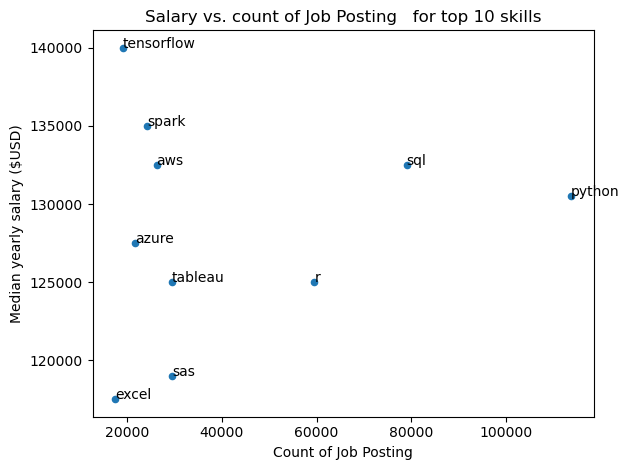

In [21]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.title('Salary vs. count of Job Posting   for top 10 skills')
plt.xlabel('Count of Job Posting')
plt.ylabel('Median yearly salary ($USD)')

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.tight_layout()
plt.show()